In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import sys
import os
import subprocess
from six import string_types
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy
from skimage import io
from scipy import ndimage
from IPython.display import display
%matplotlib inline

!pip install --upgrade pip chart_studio
import chart_studio.plotly as py
import plotly.tools as tls
from plotly.offline import iplot
import cv2
import gc
from sklearn.feature_extraction.text import CountVectorizer
from operator import itemgetter
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import tensorflow as tf

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

     |████████████████████████████████| 1.5 MB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 2.6 MB/s  eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 20.2.2
    Uninstalling pip-20.2.2:
      Successfully uninstalled pip-20.2.2


/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_11658.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_12808.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_10513.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_9859.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_1194.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_3078.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_2870.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_11474.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_3889.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_3152.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_7066.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/fi

/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_13348.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_11901.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_5423.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_3779.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_20513.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_11904.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_4944.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_1010.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_9234.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_12887.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_11408.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/

/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_15383.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_3210.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_5513.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_11331.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_17124.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_8414.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_3457.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_12071.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_10906.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_3411.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_12256.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/

/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_3791.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_4947.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_14618.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_433.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_1470.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_13920.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_6977.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_19476.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_20455.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_18867.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_15285.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/f

/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_2182.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_16636.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_6756.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_15249.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_9984.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_14814.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_17499.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_8992.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_11625.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_6939.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_1034.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/f

/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_6458.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_20430.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_6803.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_11048.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_18112.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_18394.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_10120.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_17075.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_2071.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_8361.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_4263.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/

/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_11454.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_12813.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_14729.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_19339.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_16420.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_6778.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_14392.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_3188.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_7185.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_3036.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_18593.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional

/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_14868.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_17288.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_18697.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_10380.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_4621.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_8762.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_20497.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_10404.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_7639.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_6227.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_13476.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional

/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_8731.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_13175.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_18899.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_10783.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_15598.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_12680.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_1889.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_10848.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_8601.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_463.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_1766.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/f

/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_13129.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_13947.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_6806.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_6051.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_13893.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_11736.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_11777.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_3166.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_13836.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_694.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/file_12634.jpg
/kaggle/input/planets-dataset/test-jpg-additional/test-jpg-additional/

/kaggle/input/planets-dataset/planet/planet/test-jpg/test_16476.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_15164.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_16984.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_4415.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_5227.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_31361.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_6751.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_39112.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_28161.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_30692.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_38614.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_37387.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_4832.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_5124.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/

/kaggle/input/planets-dataset/planet/planet/test-jpg/test_25628.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_8077.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_28709.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_6709.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_14821.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_39688.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_29174.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_241.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_35885.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_11132.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_38462.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_3957.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_13400.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_22979.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/

/kaggle/input/planets-dataset/planet/planet/test-jpg/test_39259.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_12893.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_34961.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_8070.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_38390.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_30696.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_18547.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_36220.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_17839.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_29845.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_39023.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_28986.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_31710.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_24825.jpg
/kaggle/input/planets-dataset/planet/planet/test-

/kaggle/input/planets-dataset/planet/planet/test-jpg/test_22884.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_14980.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_32993.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_21377.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_30066.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_13769.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_19992.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_25106.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_8062.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_30192.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_7064.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_34532.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_13538.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_36172.jpg
/kaggle/input/planets-dataset/planet/planet/test-j

/kaggle/input/planets-dataset/planet/planet/test-jpg/test_30484.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_17824.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_422.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_28966.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_14933.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_1341.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_24037.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_6091.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_20525.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_32777.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_32561.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_16390.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_3215.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_17385.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/

/kaggle/input/planets-dataset/planet/planet/test-jpg/test_18606.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_26876.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_8685.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_12365.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_12796.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_14376.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_24969.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_33842.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_19091.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_37666.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_39523.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_12479.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_25308.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_38730.jpg
/kaggle/input/planets-dataset/planet/planet/test-

/kaggle/input/planets-dataset/planet/planet/test-jpg/test_17208.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_29810.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_8330.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_24898.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_9423.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_1000.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_31423.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_21779.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_9086.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_31461.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_20802.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_17035.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_16616.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_11769.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg

/kaggle/input/planets-dataset/planet/planet/test-jpg/test_3343.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_34031.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_14711.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_40012.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_7471.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_15901.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_32787.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_2839.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_18982.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_24069.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_9560.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_7121.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_6348.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_8754.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/te

/kaggle/input/planets-dataset/planet/planet/test-jpg/test_5266.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_25369.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_36224.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_22435.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_10245.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_37676.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_7041.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_40222.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_21707.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_1594.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_9027.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_4615.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_26883.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_17604.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/

/kaggle/input/planets-dataset/planet/planet/test-jpg/test_8573.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_8060.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_514.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_36690.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_18641.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_31840.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_23847.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_7535.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_26675.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_38388.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_7587.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_18334.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_22866.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_6514.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/te

/kaggle/input/planets-dataset/planet/planet/test-jpg/test_32694.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_12455.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_27358.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_30787.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_12180.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_2038.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_12619.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_15363.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_32649.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_38539.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_786.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_10795.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_36944.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_13794.jpg
/kaggle/input/planets-dataset/planet/planet/test-jp

/kaggle/input/planets-dataset/planet/planet/test-jpg/test_37354.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_39619.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_14511.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_15552.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_37994.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_12054.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_33243.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_19092.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_37470.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_32719.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_18588.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_20113.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_26203.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_29875.jpg
/kaggle/input/planets-dataset/planet/planet/test

/kaggle/input/planets-dataset/planet/planet/test-jpg/test_24913.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_30097.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_17612.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_19847.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_20503.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_26843.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_19516.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_24338.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_31332.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_13877.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_18759.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_7144.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_35467.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_8909.jpg
/kaggle/input/planets-dataset/planet/planet/test-j

/kaggle/input/planets-dataset/planet/planet/test-jpg/test_15041.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_38618.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_34185.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_14649.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_13286.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_15996.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_6640.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_33871.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_1495.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_30961.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_6919.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_25177.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_37311.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_17508.jpg
/kaggle/input/planets-dataset/planet/planet/test-jp

/kaggle/input/planets-dataset/planet/planet/test-jpg/test_8026.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_2431.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_16358.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_16675.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_12713.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_769.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_25870.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_34344.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_14398.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_19287.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_4922.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_23783.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_8247.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_4370.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/te

/kaggle/input/planets-dataset/planet/planet/test-jpg/test_1997.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_38052.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_27625.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_16295.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_4342.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_16287.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_39219.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_24776.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_2785.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_32975.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_10041.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_4653.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_12628.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_38951.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg

/kaggle/input/planets-dataset/planet/planet/test-jpg/test_29432.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_28445.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_40276.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_13335.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_16053.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_25948.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_4454.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_25673.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_7442.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_28723.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_29744.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_37534.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_17962.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_1351.jpg
/kaggle/input/planets-dataset/planet/planet/test-jp

/kaggle/input/planets-dataset/planet/planet/test-jpg/test_14286.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_12035.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_21927.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_28449.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_2283.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_1990.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_32675.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_18981.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_22785.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_8262.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_19645.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_27168.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_25135.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_32421.jpg
/kaggle/input/planets-dataset/planet/planet/test-jp

/kaggle/input/planets-dataset/planet/planet/test-jpg/test_33160.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_31538.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_23999.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_3443.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_11775.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_8620.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_358.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_17816.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_22459.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_38260.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_8302.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_11170.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_38791.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_6116.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/t

/kaggle/input/planets-dataset/planet/planet/test-jpg/test_29590.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_13747.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_18236.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_27962.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_35453.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_17425.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_31247.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_30834.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_7273.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_12069.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_27615.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_32363.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_27694.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_22038.jpg
/kaggle/input/planets-dataset/planet/planet/test-

/kaggle/input/planets-dataset/planet/planet/test-jpg/test_24996.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_7061.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_37372.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_18244.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_6372.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_13473.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_27257.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_23212.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_7490.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_25729.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_33790.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_17132.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_40071.jpg
/kaggle/input/planets-dataset/planet/planet/test-jpg/test_19096.jpg
/kaggle/input/planets-dataset/planet/planet/test-jp

/kaggle/input/planets-dataset/planet/planet/train-jpg/train_18654.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_21328.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_12402.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_33707.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_37891.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_32605.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_29054.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_9202.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_8467.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_34411.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_16833.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_9785.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_33160.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_1115.jpg
/kaggle/input/planets-da

/kaggle/input/planets-dataset/planet/planet/train-jpg/train_31506.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_28544.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_20244.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_26783.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_2265.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_31815.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_32040.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_8679.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_1381.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_27615.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_38359.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_14159.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_2695.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_14745.jpg
/kaggle/input/planets-da

/kaggle/input/planets-dataset/planet/planet/train-jpg/train_21685.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_31093.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_11897.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_33085.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_6334.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_7444.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_18219.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_13303.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_5694.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_32967.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_12879.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_26399.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_27949.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_40449.jpg
/kaggle/input/planets-d

/kaggle/input/planets-dataset/planet/planet/train-jpg/train_990.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_15850.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_278.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_7228.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_14539.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_21724.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_200.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_404.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_19375.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_36211.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_13114.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_36000.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_37028.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_27035.jpg
/kaggle/input/planets-dataset

/kaggle/input/planets-dataset/planet/planet/train-jpg/train_37761.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_17433.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_27050.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_7986.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_13276.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_29588.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_32054.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_15600.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_17740.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_32755.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_23417.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_8348.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_8412.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_14928.jpg
/kaggle/input/planets-d

/kaggle/input/planets-dataset/planet/planet/train-jpg/train_36334.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_36996.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_31004.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_39450.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_12334.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_9680.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_18444.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_21203.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_38380.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_33605.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_31665.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_15810.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_389.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_32504.jpg
/kaggle/input/planets-d

/kaggle/input/planets-dataset/planet/planet/train-jpg/train_4372.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_19531.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_10087.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_29368.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_16108.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_19742.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_28874.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_34648.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_10712.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_33040.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_20413.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_6516.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_27052.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_3458.jpg
/kaggle/input/planets-d

/kaggle/input/planets-dataset/planet/planet/train-jpg/train_2825.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_38615.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_13910.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_26666.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_8305.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_19486.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_1804.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_38691.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_10727.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_14739.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_11483.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_28208.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_3504.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_19072.jpg
/kaggle/input/planets-da

/kaggle/input/planets-dataset/planet/planet/train-jpg/train_30288.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_5414.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_18900.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_21224.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_21440.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_30639.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_34291.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_24492.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_34639.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_17244.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_2383.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_35309.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_23718.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_17709.jpg
/kaggle/input/planets-

/kaggle/input/planets-dataset/planet/planet/train-jpg/train_19570.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_31624.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_35031.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_24778.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_22797.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_20659.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_13800.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_22014.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_19536.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_1694.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_29409.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_4649.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_14013.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_37188.jpg
/kaggle/input/planets-

/kaggle/input/planets-dataset/planet/planet/train-jpg/train_36738.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_38193.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_3724.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_17633.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_19462.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_7338.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_33140.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_6249.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_9972.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_14638.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_19968.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_32752.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_18578.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_22800.jpg
/kaggle/input/planets-da

/kaggle/input/planets-dataset/planet/planet/train-jpg/train_32329.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_4106.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_25621.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_3074.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_9669.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_19601.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_40288.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_35454.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_38460.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_19704.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_26267.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_4818.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_14562.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_39503.jpg
/kaggle/input/planets-da

/kaggle/input/planets-dataset/planet/planet/train-jpg/train_16110.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_16829.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_8688.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_2723.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_21975.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_11910.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_19821.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_28379.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_27909.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_17654.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_27002.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_19828.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_14134.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_17205.jpg
/kaggle/input/planets-

/kaggle/input/planets-dataset/planet/planet/train-jpg/train_15902.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_3768.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_33627.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_34577.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_15379.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_29066.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_5396.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_37953.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_19711.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_37117.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_7813.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_25625.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_13708.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_37104.jpg
/kaggle/input/planets-d

/kaggle/input/planets-dataset/planet/planet/train-jpg/train_21397.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_7672.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_4004.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_3999.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_34879.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_12834.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_5105.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_19129.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_9208.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_39921.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_26453.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_13680.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_4429.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_3507.jpg
/kaggle/input/planets-datas

/kaggle/input/planets-dataset/planet/planet/train-jpg/train_24452.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_29586.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_22040.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_9509.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_14509.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_35602.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_6652.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_27522.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_13416.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_38477.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_26420.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_614.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_7735.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_20449.jpg
/kaggle/input/planets-dat

/kaggle/input/planets-dataset/planet/planet/train-jpg/train_11805.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_29306.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_4728.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_22897.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_9367.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_12038.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_1820.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_29743.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_40275.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_10003.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_5330.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_26110.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_12299.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_6735.jpg
/kaggle/input/planets-dat

/kaggle/input/planets-dataset/planet/planet/train-jpg/train_34926.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_922.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_24686.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_37982.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_5581.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_13485.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_10874.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_7526.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_6743.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_17029.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_26079.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_29645.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_16896.jpg
/kaggle/input/planets-dataset/planet/planet/train-jpg/train_38602.jpg
/kaggle/input/planets-dat

In [5]:
!ls -lha ../input/planets-dataset/planet/planet

total 6.9M
drwxr-xr-x 4 nobody nogroup 4.0K Jul 20 20:57 .
drwxr-xr-x 3 nobody nogroup 4.0K Jul 20 20:54 ..
-rw-r--r-- 1 nobody nogroup 2.8M Jul 20 20:54 sample_submission.csv
drwxr-xr-x 2 nobody nogroup 1.4M Jul 20 20:55 test-jpg
drwxr-xr-x 2 nobody nogroup 1.4M Jul 20 20:57 train-jpg
-rw-r--r-- 1 nobody nogroup 1.4M Jul 20 20:57 train_classes.csv


In [6]:
from subprocess import check_output
print(check_output(["ls", "../input/planets-dataset/planet/planet"]).decode("utf8"))

sample_submission.csv
test-jpg
train-jpg
train_classes.csv



In [7]:
train_classes = pd.read_csv('../input/planets-dataset/planet/planet/train_classes.csv')

In [8]:
#using a explicit lambda function to iterate the classes
flatten = lambda l: [item for sublist in l for item in sublist]

#using the lambda function to create our labels
labels = list(set(flatten([l.split(' ') for l in train_classes['tags'].values])))

#Creating our label map
label_map = {l: i for i, l in enumerate(labels)}

In [9]:
sample_submission_df = pd.read_csv('../input/planets-dataset/planet/planet/sample_submission.csv')
sample_submission_df.head()

image_name                                  tags
0     test_0  primary clear agriculture road water
1     test_1  primary clear agriculture road water
2     test_2  primary clear agriculture road water
3     test_3  primary clear agriculture road water
4     test_4  primary clear agriculture road water

In [10]:
test1 = !ls ../input/planets-dataset/planet/planet/test-jpg | wc -l
test2 = !ls ../input/planets-dataset/test-jpg-additional/test-jpg-additional | wc -l
assert sample_submission_df.shape[0] == float(test1[0])+float(test2[0])

In [11]:
# Print all unique tags
from itertools import chain
labels_list = list(chain.from_iterable([tags.split(" ") for tags in train_classes['tags'].values]))
labels_set = set(labels_list)
print("There is {} unique labels including {}".format(len(labels_set), labels_set))

There is 17 unique labels including {'blow_down', 'primary', 'cloudy', 'cultivation', 'slash_burn', 'road', 'blooming', 'partly_cloudy', 'conventional_mine', 'clear', 'selective_logging', 'habitation', 'bare_ground', 'haze', 'agriculture', 'water', 'artisinal_mine'}


In [12]:
assert len(train_classes['image_name'].unique()) == train_classes.shape[0]

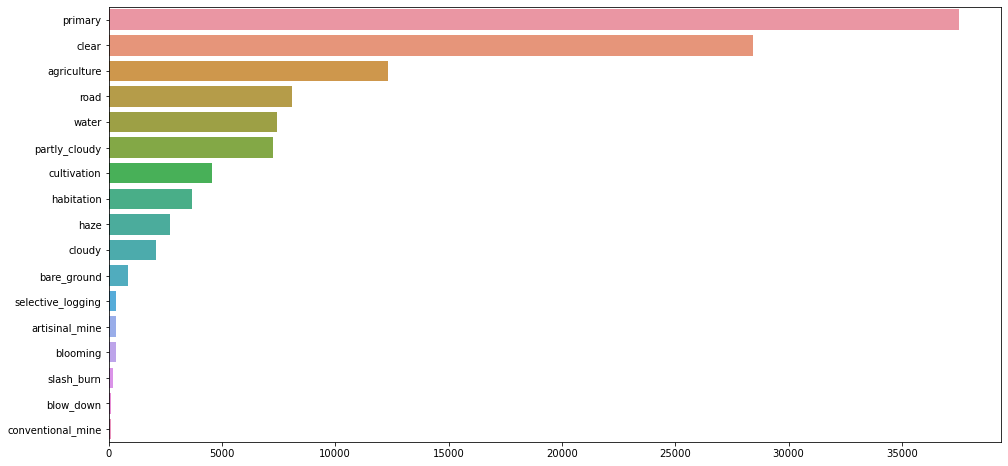

In [13]:
# Histogram of label instances
labels_s = pd.Series(labels_list).value_counts() # To sort them by count
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x=labels_s, y=labels_s.index, orient='h')

In [14]:
#setting the directories
data_root_folder = os.path.abspath("../input/planets-dataset/")
train_jpeg_dir = os.path.join(data_root_folder, 'planet/planet/train-jpg')
test_jpeg_dir = os.path.join(data_root_folder, 'planet/planet/test-jpg')
test_jpeg_additional = os.path.join(data_root_folder, 'test-jpg-additional/test-jpg-additional')

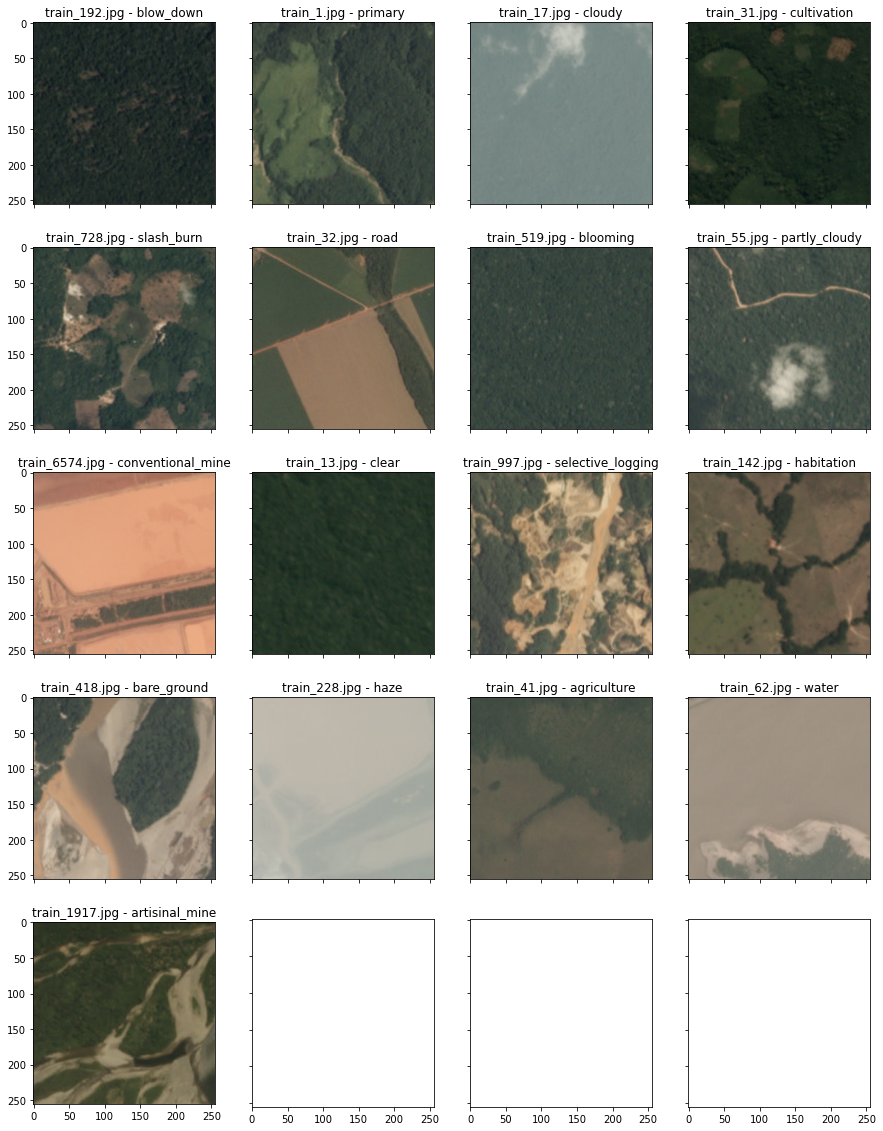

In [15]:
images_title = [train_classes[train_classes['tags'].str.contains(label)].iloc[i]['image_name'] + '.jpg' 
                for i, label in enumerate(labels_set)]

plt.rc('axes', grid=False)
_, axs = plt.subplots(5, 4, sharex='col', sharey='row', figsize=(15, 20))
axs = axs.ravel()

for i, (image_name, label) in enumerate(zip(images_title, labels_set)):
    img = mpimg.imread(train_jpeg_dir + '/' + image_name)
    axs[i].imshow(img)
    axs[i].set_title('{} - {}'.format(image_name, label))

In [16]:
# let's do one hot encoding (vectorize) the labels in 'train_classes'
for tag in labels_set:
    train_classes[tag] = train_classes['tags'].apply(lambda x: 1 if tag in x.split() else 0)
    
# adding '.jpg' extension to 'image_name'
train_classes['image_name'] = train_classes['image_name'].apply(lambda x: '{}.jpg'.format(x)) 
train_classes.head()

image_name                                       tags  blow_down  primary  \
0  train_0.jpg                               haze primary          0        1   
1  train_1.jpg            agriculture clear primary water          0        1   
2  train_2.jpg                              clear primary          0        1   
3  train_3.jpg                              clear primary          0        1   
4  train_4.jpg  agriculture clear habitation primary road          0        1   

   cloudy  cultivation  slash_burn  road  blooming  partly_cloudy  \
0       0            0           0     0         0              0   
1       0            0           0     0         0              0   
2       0            0           0     0         0              0   
3       0            0           0     0         0              0   
4       0            0           0     1         0              0   

   conventional_mine  clear  selective_logging  habitation  bare_ground  haze  \
0                  0      0                  0           0            0     1   
1                  0      1                  0           0            0     0   
2                  0      1                  0           0            0     0   
3                  0      1                  0           0            0     0   
4                  0      1                  0           1            0     0   

   agriculture  water  artisinal_mine  
0            0      0               0  
1            1      1               0  
2            0      0               0  
3            0      0               0  
4            1      0               0

In [17]:
y_col = list(train_classes.columns[2:]) # storing the tags column names as a variable

# initializing an image generator with some data augumentation
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

img_resize = (224, 224) # The resize size of each image ex: (64, 64) or None to use the default image size

# loading images from dataframe
X = img_gen.flow_from_dataframe(dataframe=train_classes, directory=train_jpeg_dir, x_col='image_name', y_col=y_col, \
       target_size=img_resize, class_mode='raw', seed=1, batch_size=128)

Found 40479 validated image filenames.


In [18]:
# X is an iterable, It contains 317 batches, each batch contains 128 images and labels because 
#40479 / 128 is 316 remainder 31 each image is of shape (128, 128, 3), each label is of shape (17, )

# let's abitrarily view an image
x120 = X[0][0][120] # first batch, images, 109th image
y120 = X[0][1][120] # first batch, labels, 109th label
print("Images shape are {}".format(x120.shape))
print("and label's shape is {}".format(y120.shape))
print('There are {} batches'.format(len(X)))
print('and each batch has {} images/labels'.format(X[0][0].shape[0]))
print('40479/128 is {:.2F}, so the last batch will have {} images/labels'.format(40479/128, X[316][0].shape[0]))

Images shape are (224, 224, 3)
and label's shape is (17,)
There are 317 batches
and each batch has 128 images/labels
40479/128 is 316.24, so the last batch will have 31 images/labels


In [19]:
!ls ../working/

__notebook_source__.ipynb


In [20]:
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Conv2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, History, ReduceLROnPlateau
#model= keras.applications.nasnet.NASNetLarge()

In [21]:
train_image_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,validation_split=0.2)

# generating the 80% training image data
train_gen = train_image_gen.flow_from_dataframe(dataframe=train_classes, directory=train_jpeg_dir, x_col='image_name', y_col=y_col, \
       target_size=img_resize, class_mode='raw', seed=0, batch_size=128, subset='training')

# generating the 20% validation image data
val_gen = train_image_gen.flow_from_dataframe(dataframe=train_classes, directory=train_jpeg_dir, x_col='image_name', y_col=y_col, \
       target_size=img_resize, class_mode='raw', seed=0, batch_size=128, subset='validation')

Found 32384 validated image filenames.
Found 8095 validated image filenames.


In [22]:
from keras import backend as K

def fbeta_score_K(y_true, y_pred):
    beta_squared = 4

    tp = K.sum(y_true * y_pred) + K.epsilon()
    fp = K.sum(y_pred) - tp
    fn = K.sum(y_true) - tp

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    result = (beta_squared + 1) * (precision * recall) / (beta_squared * precision + recall + K.epsilon())

    return result

In [23]:
IMG_SIZE = 224
mean_pix = np.array([102.9801, 115.9465, 122.7717]) #It is BGR

from keras.applications import ResNet50

#Compile model and set non-top layets non-trainable (warm-up)
base_model1 = ResNet50(include_top=False, input_shape=(IMG_SIZE,IMG_SIZE,3), pooling='avg', weights='imagenet')
for layer in base_model1.layers:
    layer.trainable = False

x = base_model1.output
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
output = Dense(17, activation='sigmoid')(x)

optimizer = Adam(0.01, decay=0.0003)
model2 = Model(inputs=base_model1.inputs, outputs=output)

94773248/94765736 [==============================] - 1s 0us/step


In [24]:
history = History()
callbacks = [ModelCheckpoint('../working/planet.hdf5', monitor='val_loss', save_best_only=True, verbose=2, save_weights_only=False),
             ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1, mode='auto', epsilon=0.0001, cooldown=0, min_lr=0.0000001),
             EarlyStopping(monitor='val_loss', patience=5, verbose=0)]


# setting step size for training and validation image data
step_train_size = int(np.ceil(train_gen.samples / train_gen.batch_size))
step_val_size = int(np.ceil(val_gen.samples / train_gen.batch_size))

model2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', fbeta_score_K])

# fitting the model
history1 = model2.fit(x=train_gen, steps_per_epoch=step_train_size, validation_data=val_gen, validation_steps=step_val_size,
         epochs=5, callbacks=callbacks)

Epoch 1/5
253/253 [==============================] - ETA: 0s - loss: 0.2960 - accuracy: 0.8876 - fbeta_score_K: 0.5502
Epoch 00001: val_loss improved from inf to 0.25279, saving model to ../working/planet.hdf5
253/253 [==============================] - 209s 828ms/step - loss: 0.2960 - accuracy: 0.8876 - fbeta_score_K: 0.5502 - val_loss: 0.2528 - val_accuracy: 0.9234 - val_fbeta_score_K: 0.5517
Epoch 2/5
253/253 [==============================] - ETA: 0s - loss: 0.2530 - accuracy: 0.9245 - fbeta_score_K: 0.5564
Epoch 00002: val_loss improved from 0.25279 to 0.25006, saving model to ../working/planet.hdf5
253/253 [==============================] - 159s 629ms/step - loss: 0.2530 - accuracy: 0.9245 - fbeta_score_K: 0.5564 - val_loss: 0.2501 - val_accuracy: 0.9234 - val_fbeta_score_K: 0.5705
Epoch 3/5
253/253 [==============================] - ETA: 0s - loss: 0.2508 - accuracy: 0.9245 - fbeta_score_K: 0.5611
Epoch 00003: val_loss improved from 0.25006 to 0.24286, saving model to ../working/

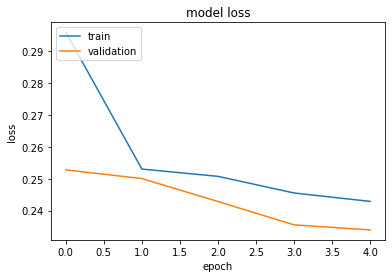

In [25]:
#visualise the loss function
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [26]:
#Compile model and set all layers trainable
optimizer = Adam(0.01, decay=0.000001)
model2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', fbeta_score_K])
model2.load_weights('../working/planet.hdf5', by_name=True)
for layer in base_model1.layers:
    layer.trainable = True


model2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', fbeta_score_K])

# fitting the model
history2 = model2.fit(x=train_gen, steps_per_epoch=step_train_size, validation_data=val_gen, validation_steps=step_val_size,
         epochs=5, callbacks=callbacks)

Epoch 1/5
253/253 [==============================] - ETA: 0s - loss: 0.2612 - accuracy: 0.9067 - fbeta_score_K: 0.6270
Epoch 00001: val_loss did not improve from 0.23395
253/253 [==============================] - 199s 785ms/step - loss: 0.2612 - accuracy: 0.9067 - fbeta_score_K: 0.6270 - val_loss: 0.4732 - val_accuracy: 0.6739 - val_fbeta_score_K: 0.6080
Epoch 2/5
253/253 [==============================] - ETA: 0s - loss: 0.1744 - accuracy: 0.8420 - fbeta_score_K: 0.6987
Epoch 00002: val_loss did not improve from 0.23395
253/253 [==============================] - 214s 845ms/step - loss: 0.1744 - accuracy: 0.8420 - fbeta_score_K: 0.6987 - val_loss: 0.3948 - val_accuracy: 0.9234 - val_fbeta_score_K: 0.6033
Epoch 3/5
253/253 [==============================] - ETA: 0s - loss: 0.1621 - accuracy: 0.7720 - fbeta_score_K: 0.7182
Epoch 00003: val_loss did not improve from 0.23395
253/253 [==============================] - 196s 775ms/step - loss: 0.1621 - accuracy: 0.7720 - fbeta_score_K: 0.7182

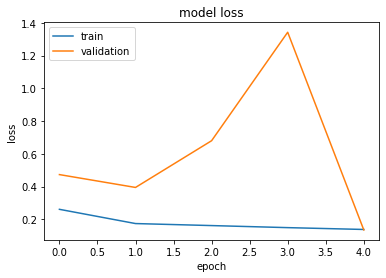

In [27]:
#visualise the loss function
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [28]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(17, activation='sigmoid')(x)

# this is the model we will train
models = Model(inputs=base_model.input, outputs=predictions)

87916544/87910968 [==============================] - 1s 0us/step


In [29]:
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
models.compile(optimizer=Adam(lr=1e-3), loss='binary_crossentropy')


callbacks = [history, 
             EarlyStopping(monitor='val_loss', patience=3, verbose=2, min_delta=1e-4),
             ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, cooldown=0, min_lr=1e-7, verbose=2),
             ModelCheckpoint(filepath='../working/weights_2.hdf5', monitor='val_fbeta', verbose=2, save_best_only=True, \
                             save_weights_only=True, mode='auto')]


# setting step size for training and validation image data
step_train_size = int(np.ceil(train_gen.samples / train_gen.batch_size))
step_val_size = int(np.ceil(val_gen.samples / train_gen.batch_size))

models.compile(optimizer=Adam(lr=1e-3), loss='binary_crossentropy', metrics = ['accuracy', fbeta_score_K])
# train the model on the new data for a few epochs
models.fit(x=train_gen, steps_per_epoch=step_train_size, validation_data=val_gen, validation_steps=step_val_size,
         epochs=5, callbacks=callbacks)

# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

Epoch 1/5
253/253 [==============================] - 154s 608ms/step - loss: 0.1495 - accuracy: 0.8421 - fbeta_score_K: 0.7608 - val_loss: 0.1236 - val_accuracy: 0.8773 - val_fbeta_score_K: 0.7888
Epoch 2/5
253/253 [==============================] - 152s 599ms/step - loss: 0.1228 - accuracy: 0.8506 - fbeta_score_K: 0.7908 - val_loss: 0.1213 - val_accuracy: 0.8498 - val_fbeta_score_K: 0.7750
Epoch 3/5
253/253 [==============================] - 152s 601ms/step - loss: 0.1168 - accuracy: 0.8485 - fbeta_score_K: 0.7997 - val_loss: 0.1196 - val_accuracy: 0.8371 - val_fbeta_score_K: 0.8021
Epoch 4/5
253/253 [==============================] - ETA: 0s - loss: 0.1132 - accuracy: 0.8401 - fbeta_score_K: 0.8061
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
253/253 [==============================] - 151s 597ms/step - loss: 0.1132 - accuracy: 0.8401 - fbeta_score_K: 0.8061 - val_loss: 0.1205 - val_accuracy: 0.8546 - val_fbeta_score_K: 0.7999
Epoch 5/5
253/253 [===

In [32]:
# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in models.layers[:249]:
   layer.trainable = False
for layer in models.layers[249:]:
   layer.trainable = True


callbacks = [history, 
             EarlyStopping(monitor='val_loss', patience=3, verbose=2, min_delta=1e-4),
             #ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, cooldown=0, min_lr=1e-7, verbose=2),
             ModelCheckpoint(filepath='../working/weights_2.hdf5', monitor='val_loss', verbose=2, save_best_only=True, \
                             save_weights_only=True, mode='auto')]


# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from tensorflow.keras.optimizers import SGD
models.compile(optimizer=Adam(lr=0.01), loss='binary_crossentropy', metrics = ['accuracy', fbeta_score_K])

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
history3 = models.fit(x=train_gen, steps_per_epoch=step_train_size, validation_data=val_gen, validation_steps=step_val_size,
         epochs=5, callbacks=callbacks)

Epoch 1/5
253/253 [==============================] - ETA: 0s - loss: 0.1642 - accuracy: 0.8591 - fbeta_score_K: 0.7573
Epoch 00001: val_loss improved from inf to 0.14147, saving model to ../working/weights_2.hdf5
253/253 [==============================] - 157s 620ms/step - loss: 0.1642 - accuracy: 0.8591 - fbeta_score_K: 0.7573 - val_loss: 0.1415 - val_accuracy: 0.8484 - val_fbeta_score_K: 0.7836
Epoch 2/5
253/253 [==============================] - ETA: 0s - loss: 0.1143 - accuracy: 0.8402 - fbeta_score_K: 0.8097
Epoch 00002: val_loss improved from 0.14147 to 0.11958, saving model to ../working/weights_2.hdf5
253/253 [==============================] - 155s 613ms/step - loss: 0.1143 - accuracy: 0.8402 - fbeta_score_K: 0.8097 - val_loss: 0.1196 - val_accuracy: 0.8290 - val_fbeta_score_K: 0.8133
Epoch 3/5
253/253 [==============================] - ETA: 0s - loss: 0.1052 - accuracy: 0.8249 - fbeta_score_K: 0.8247
Epoch 00003: val_loss improved from 0.11958 to 0.10730, saving model to ../wo

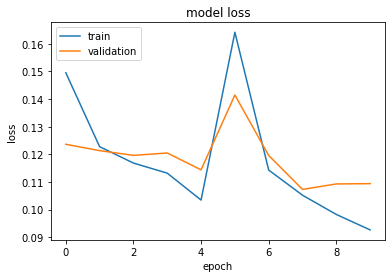

In [33]:
#visualise the loss function
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [34]:
# building a sequential model for testing

#loading the weight of a trained resnet50 model
model2.load_weights('../working/planet.hdf5')

#loading the weight of a trained inceptionv3 model
models.load_weights('../working/weights_2.hdf5')

In [35]:
# adding .jpg extension to 'image_name' in sample_submission data
sample_sub = sample_submission_df.copy()
sample_sub['image_name'] = sample_sub['image_name'].apply(lambda x: '{}.jpg'.format(x))
sample_sub.head()

image_name                                  tags
0  test_0.jpg  primary clear agriculture road water
1  test_1.jpg  primary clear agriculture road water
2  test_2.jpg  primary clear agriculture road water
3  test_3.jpg  primary clear agriculture road water
4  test_4.jpg  primary clear agriculture road water

In [36]:
# selecting the first 40669 'image_name'(s) from the submission_sample dataframe to generate image data from 
# test.jpg folder
test1_df = sample_sub.iloc[:40669]['image_name'].reset_index().drop('index', axis=1)
test1_df.head()

image_name
0  test_0.jpg
1  test_1.jpg
2  test_2.jpg
3  test_3.jpg
4  test_4.jpg

In [37]:
# initializing an image data generator object for the first 40669 images in the sample submission dataframe
test_image_gen1 = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

# generating the image data for the first 40669 images in the sample submission dataframe
test_gen1 = test_image_gen1.flow_from_dataframe(dataframe=test1_df, \
            directory=test_jpeg_dir, x_col='image_name', y_col=None, \
            batch_size=128, shuffle=False, class_mode=None, target_size=img_resize)

# setting the step size for the testing set for the first 40669 images in the sample submission dataframe
step_test_size1 = int(np.ceil(test_gen1.samples / test_gen1.batch_size))

Found 40669 validated image filenames.


In [38]:
test_gen1.reset() # reseting the generator to be sure of avoiding shuffling
pred = model2.predict(test_gen1, steps=step_test_size1, verbose=1) # predicts the first 40669 images in the 
                                                                    # sample submission dataframe

#inception model prediction
pred1 = models.predict(test_gen1, steps=step_test_size1, verbose=1)

318/318 [==============================] - 158s 497ms/step


In [39]:
unique_labels = set()
def append_labels(tags):
    for tag in tags.split():
        unique_labels.add(tag)

train_classes = train_classes.copy()
train_classes['tags'].apply(append_labels)
unique_labels = list(unique_labels)
print(unique_labels)

['blow_down', 'primary', 'cloudy', 'cultivation', 'slash_burn', 'road', 'blooming', 'partly_cloudy', 'conventional_mine', 'clear', 'selective_logging', 'habitation', 'bare_ground', 'haze', 'agriculture', 'water', 'artisinal_mine']


In [40]:
test_file_names1 = test_gen1.filenames # storing the filenames (images names) of the first 40669 images names in \
# the sample submission dataframe as ordered in the prediction as a variable
        
# converting the predictions of the first 40669 to tag names
pred_tags = pd.DataFrame(pred)
pred_tags = pred_tags.apply(lambda x: ' '.join(np.array(unique_labels)[x > 0.5]), axis=1)

# converting the predictions of the first 40669 to a dataframe
import pandas as pd
result1 = pd.DataFrame({'image_name': test_file_names1, 'tags': pred_tags})
print(result1.head())


#inception model
# converting the predictions of the first 40669 to tag names
pred_tags1 = pd.DataFrame(pred1)
pred_tags1 = pred_tags1.apply(lambda x: ' '.join(np.array(unique_labels)[x > 0.5]), axis=1)

# converting the predictions of the first 40669 to a dataframe
import pandas as pd
result12 = pd.DataFrame({'image_name': test_file_names1, 'tags': pred_tags1})
print(result12.head())

   image_name                   tags
0  test_0.jpg          primary clear
1  test_1.jpg  primary partly_cloudy
2  test_2.jpg  primary partly_cloudy
3  test_3.jpg          primary clear
4  test_4.jpg                 cloudy
   image_name                   tags
0  test_0.jpg          primary clear
1  test_1.jpg          primary clear
2  test_2.jpg  primary partly_cloudy
3  test_3.jpg          primary clear
4  test_4.jpg  primary partly_cloudy


In [41]:
# selecting the remaining 'image_name'(s) from the submission_sample dataframe to generate image data from 
# test-additional.jpg folder
test2_df = sample_sub.iloc[40669:]['image_name'].reset_index().drop('index', axis=1)
test2_df.head()

image_name
0     file_0.jpg
1     file_1.jpg
2    file_10.jpg
3   file_100.jpg
4  file_1000.jpg

In [ ]:
# initializing an image data generator object for the remaining images in the sample submission dataframe
test_image_gen2 = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

# generating the image data for the remaining images in the sample submission dataframe
test_gen2 = test_image_gen2.flow_from_dataframe(dataframe=test2_df, \
            directory=test_jpeg_additional, x_col='image_name', \
            y_col=None, batch_size=128, shuffle=False, class_mode=None, target_size=img_resize)

# setting the step size for the testing set for the remaining images in the sample submission dataframe
step_test_size2 = int(np.ceil(test_gen2.samples / test_gen2.batch_size))


test_gen2.reset() # reseting the generator to be sure of avoiding shuffling
pred2 = model2.predict(test_gen2, steps=step_test_size2, verbose=1) # predicts the remaining images in the 
                                                                    # sample submission dataframe
pred22 = models.predict(test_gen2, steps=step_test_size2, verbose=1)

Found 20522 validated image filenames.
138/161 [========================>.....] - ETA: 11s

In [ ]:
test_file_names2 = test_gen2.filenames # storing the filenames (images names) of the remaining images names in 
                                       # the sample submission dataframe as ordered in the prediction as a 
                                       # variable
        
# converting the predictions of the remaining images to tag names
pred_tags2 = pd.DataFrame(pred2)
pred_tags2 = pred_tags2.apply(lambda x: ' '.join(np.array(unique_labels)[x > 0.5]), axis=1)

# converting the predictions of the remaining to a dataframe
result2 = pd.DataFrame({'image_name': test_file_names2, 'tags': pred_tags2})
print(result2.head())


#inception model
# converting the predictions of the remaining images to tag names
pred_tags22 = pd.DataFrame(pred22)
pred_tags22 = pred_tags22.apply(lambda x: ' '.join(np.array(unique_labels)[x > 0.5]), axis=1)

# converting the predictions of the remaining to a dataframe
result22 = pd.DataFrame({'image_name': test_file_names2, 'tags': pred_tags22})
print(result22.head())

In [ ]:
final_result = pd.concat([result1, result2]) # concatenate the predictions of the test.jpg and 
                                             # test-additional.jpg into a single dataframe
    
final_result = final_result.reset_index().drop('index', axis=1) # reseting the index of the dataframe so it 
                                                                # matches that of sample submission datafarme

print(final_result.shape)
final_result.head()

final_result1 = pd.concat([result12, result22]) # concatenate the predictions of the test.jpg and 
                                             # test-additional.jpg into a single dataframe
    
final_result1 = final_result1.reset_index().drop('index', axis=1) # reseting the index of the dataframe so it 
                                                                # matches that of sample submission datafarme

print(final_result1.shape)
final_result1.head()

In [ ]:
# confirming that the predicted images are ordered as in sample submission dataframe
assert sum(sample_sub['image_name'] == final_result['image_name']) == 61191
assert sum(sample_sub['image_name'] == final_result1['image_name']) == 61191

In [ ]:
# removing the .jpg extension from 'iamge_name' column
final_result['image_name'] = final_result['image_name'].apply(lambda x: x[:-4])
final_result.head()

final_result1['image_name'] = final_result1['image_name'].apply(lambda x: x[:-4])
final_result1.head()

In [ ]:
final_result.to_csv('sixth_submission.csv', index=False) # saving the predictions
final_result1.to_csv('seventh_submission.csv', index=False) # saving the predictions

In [ ]:
!ls ../working